In [5]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = {'mother height':[58,62,60,64,67,70],'daughter height':[60,60,58,60,70,72]}

In [7]:
df = pd.DataFrame(data)
df.to_csv('hypothetical_data.csv')

In [8]:
mean_height = df['mother height'].mean()
std_height = df['mother height'].std()
df['mother height'] = (df['mother height'] - mean_height) / std_height

b0 = 0.0
b1 = 0.0
val = 1000
while val>0:
    for i,j in zip(df['mother height'],df['daughter height']):
        predict = b0+b1*i
       # print(predict - j)
        b0 = b0-0.001*(predict-j)
        b1 = b1-0.001*(predict-j)*i
    val = val-1
print(b0,b1)
input_value = 63

normalized_input = (input_value - mean_height) / std_height

predicted_height = b0 + b1 * normalized_input
print(predicted_height)
df['predicted height'] = b0 + b1 * df['mother height']
mse = np.mean((df['predicted height'] - df['daughter height']) ** 2)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

63.177097373924866 5.345792339384063
62.57791979964046
Mean Squared Error (MSE): 6.127005734329901
Root Mean Squared Error (RMSE): 2.4752789205117676


In [9]:
b0 = 0.0
b1 = 0.0
learning_rate = 0.001  # Smaller learning rate
iterations = 1000  # Number of iterations

# Gradient Descent Loop
for _ in range(iterations):
    total_error_b0 = 0
    total_error_b1 = 0
    
    for i, j in zip(df['mother height'], df['daughter height']):
        predict = b0 + b1 * i
        error = predict - j
        total_error_b0 += error
        total_error_b1 += error * i
    
    # Update parameters
    b0 -= learning_rate * total_error_b0 / len(df)
    b1 -= learning_rate * total_error_b1 / len(df)

# Denormalize predictions
def denormalize(value):
    return value * std_height + mean_height

# Print final parameters and prediction for normalized mother height = (63 - mean_height) / std_height
mother_height_normalized = (63 - mean_height) / std_height
print(f"b0: {b0}, b1: {b1}")
print(f"Prediction for mother height 63 (denormalized): {denormalize(b0 + b1 * mother_height_normalized)}")



b0: 40.04595643117226, b1: 3.0426908115887676
Prediction for mother height 63 (denormalized): 240.6213277355864


Optimized b0: 63.33111225848939
Optimized b1: 5.406799930932803


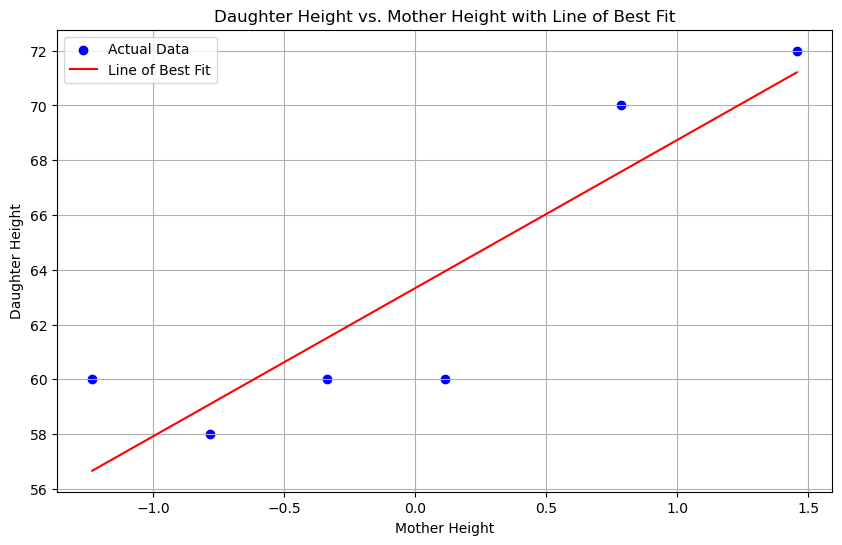

In [10]:
mean_height = df['mother height'].mean()
std_height = df['mother height'].std()
df['mother height'] = (df['mother height'] - mean_height) / std_height

# Initialize parameters
b0 = 0.0
b1 = 0.0
learning_rate = 0.01
iterations = 1000  # Increased number of iterations for better convergence

# Gradient Descent
for _ in range(iterations):
    for i, j in zip(df['mother height'], df['daughter height']):
        predict = b0 + b1 * i
        error = predict - j
        b0 -= learning_rate * error
        b1 -= learning_rate * error * i

print(f"Optimized b0: {b0}")
print(f"Optimized b1: {b1}")

# Compute predictions
df['predicted height'] = b0 + b1 * df['mother height']

# Plotting
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(df['mother height'] * std_height + mean_height, df['daughter height'], color='blue', label='Actual Data')

# Plot the line of best fit
x_values = np.linspace(df['mother height'].min() * std_height + mean_height, df['mother height'].max() * std_height + mean_height, 100)
y_values = b0 + b1 * ((x_values - mean_height) / std_height)
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

# Labels and title
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs. Mother Height with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

Optimized b0: 48.54520351209309
Optimized b1: 3.671542628950357


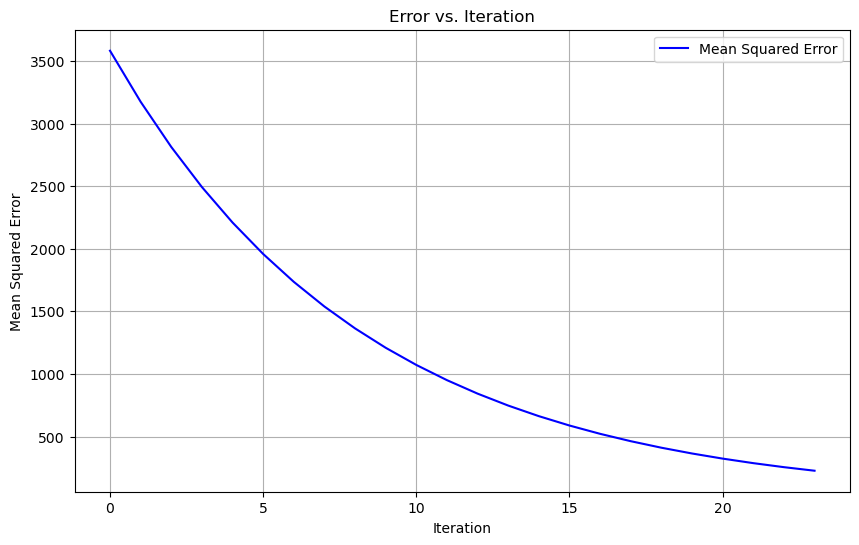

In [11]:
mean_height = df['mother height'].mean()
std_height = df['mother height'].std()
df['mother height'] = (df['mother height'] - mean_height) / std_height

# Initialize parameters
b0 = 0.0
b1 = 0.0
learning_rate = 0.01
epochs = 4  # Number of epochs
iterations_per_epoch = len(df)  # Number of iterations per epoch
total_iterations = epochs * iterations_per_epoch

# Lists to track error
errors = []

# Gradient Descent with error tracking
for epoch in range(epochs):
    for _ in range(iterations_per_epoch):
        for i, j in zip(df['mother height'], df['daughter height']):
            predict = b0 + b1 * i
            error = predict - j
            b0 -= learning_rate * error
            b1 -= learning_rate * error * i

        # Compute mean squared error for this iteration
        predictions = b0 + b1 * df['mother height']
        mse = np.mean((predictions - df['daughter height']) ** 2)
        errors.append(mse)

print(f"Optimized b0: {b0}")
print(f"Optimized b1: {b1}")

# Plotting the error vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(total_iterations), errors, color='blue', label='Mean Squared Error')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
data = {'Hours of study':[1,2,3,4,5,6,7,8],'pass':[0,0,0,0,1,1,1,1]}

In [13]:
df = pd.DataFrame(data)
df.to_csv('study_hours.csv')

Optimized b0: -5.135167175325533
Optimized b1: 1.2192607011117025
Predicted probability for 3.5 hours of study: 0.30
Predicted probability for 7.5 hours of study: 0.98


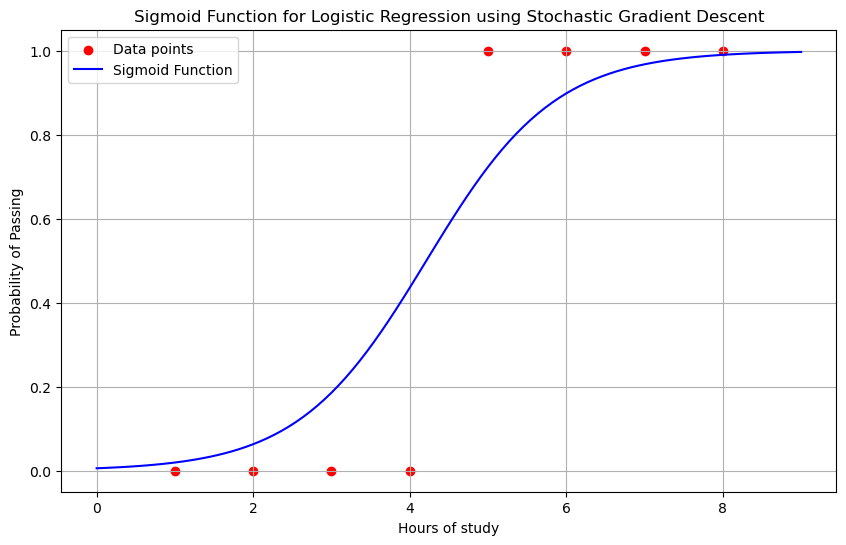

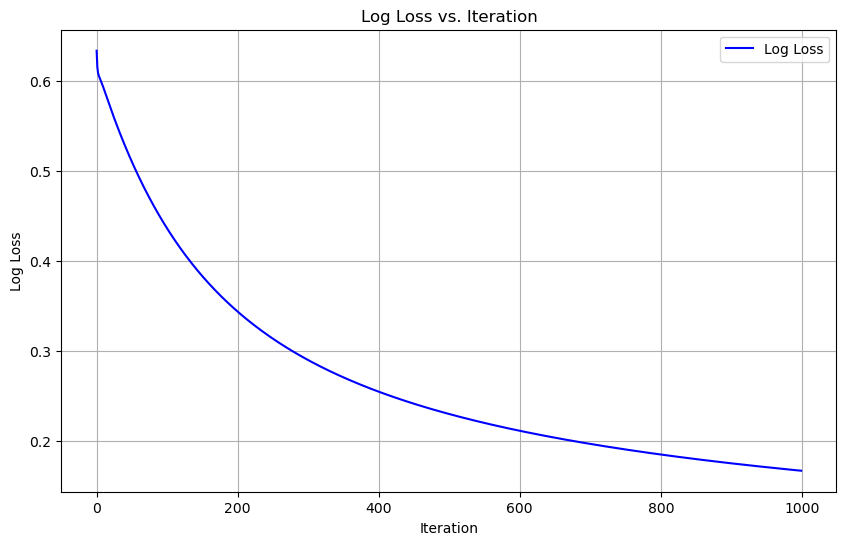

In [14]:
b0 = 0.0
b1 = 0.0
learning_rate = 0.01
iterations = 1000

# Lists to track errors
log_losses = []

# Gradient Descent
for iteration in range(iterations):
    for i, j in zip(df['Hours of study'], df['pass']):
        # Compute the prediction using the logistic function
        predict = 1 / (1 + np.exp(-(b0 + b1 * i)))
        error = predict - j
        
        # Update the parameters using the gradient of the loss function
        b0 -= learning_rate * error
        b1 -= learning_rate * error * i

    # Compute the log loss for this iteration
    predictions = 1 / (1 + np.exp(-(b0 + b1 * df['Hours of study'])))
    epsilon = 1e-15  # Small value to avoid log(0)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    log_loss = -np.mean(df['pass'] * np.log(predictions) + (1 - df['pass']) * np.log(1 - predictions))
    log_losses.append(log_loss)

# Print the optimized parameters
print(f"Optimized b0: {b0}")
print(f"Optimized b1: {b1}")

# Predict values for specific inputs
def predict_probability(hours_of_study):
    return 1 / (1 + np.exp(-(b0 + b1 * hours_of_study)))

predict_3_5 = predict_probability(3.5)
predict_7_5 = predict_probability(7.5)

print(f"Predicted probability for 3.5 hours of study: {predict_3_5:.2f}")
print(f"Predicted probability for 7.5 hours of study: {predict_7_5:.2f}")

# Plotting the sigmoid function
x_values = np.linspace(df['Hours of study'].min() - 1, df['Hours of study'].max() + 1, 100)
y_values = 1 / (1 + np.exp(-(b0 + b1 * x_values)))

plt.figure(figsize=(10, 6))
plt.scatter(df['Hours of study'], df['pass'], color='red', label='Data points')
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.xlabel('Hours of study')
plt.ylabel('Probability of Passing')
plt.title('Sigmoid Function for Logistic Regression using Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Plotting log loss vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), log_losses, color='blue', label='Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()

Optimized b0 (intercept): -3.9223038967769632
Optimized b1 (coefficient): 1.1206952510393666
Accuracy: 1.00


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


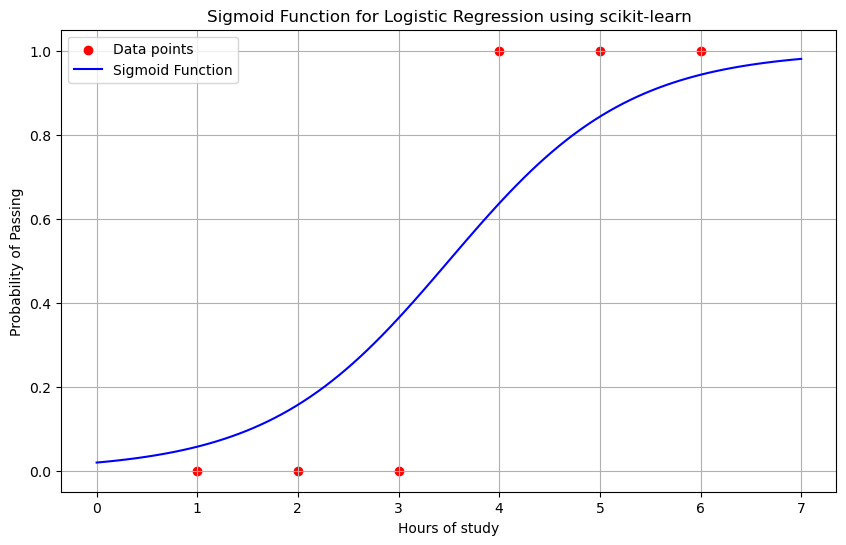

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Define the dataset
data = {
    'Hours of study': [1, 2, 3, 4, 5, 6],
    'pass': [0, 0, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

# Prepare the features and target variable
X = df[['Hours of study']]
y = df['pass']

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Print the model coefficients
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(f"Optimized b0 (intercept): {b0}")
print(f"Optimized b1 (coefficient): {b1}")

# Make predictions
df['predicted_prob'] = model.predict_proba(X)[:, 1]

# Convert probabilities to binary outcomes
threshold = 0.5
df['predicted_class'] = (df['predicted_prob'] >= threshold).astype(int)

# Compute accuracy
correct_predictions = (df['predicted_class'] == df['pass']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

# Plotting the sigmoid function
import matplotlib.pyplot as plt

# Generate values for Hours of study
x_values = np.linspace(df['Hours of study'].min() - 1, df['Hours of study'].max() + 1, 100)
x_values_reshaped = x_values.reshape(-1, 1)  # Reshape for prediction
# Compute sigmoid function (probability of passing)
y_values = model.predict_proba(x_values_reshaped)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['Hours of study'], df['pass'], color='red', label='Data points')
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.xlabel('Hours of study')
plt.ylabel('Probability of Passing')
plt.title('Sigmoid Function for Logistic Regression using scikit-learn')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
data = {'x1':[4,2,1,3,1,6],'x2':[1,8,0,2,4,7],'y':[1,0,1,0,0,0]}
df = pd.DataFrame(data)
df.to_csv('q3data.csv')

Optimized b0: 1.095068197708901
Optimized b1: 1.2583970172688976
Optimized b2: -3.5152667466687326
Accuracy: 1.00


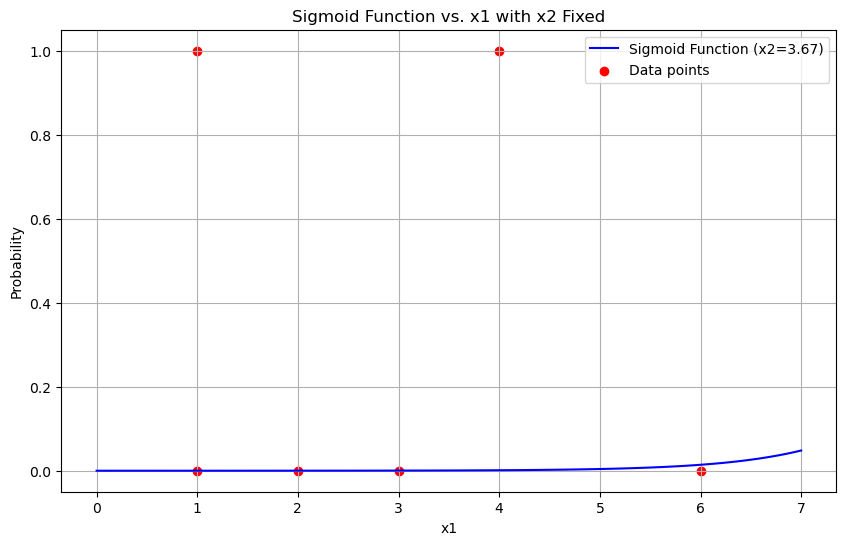

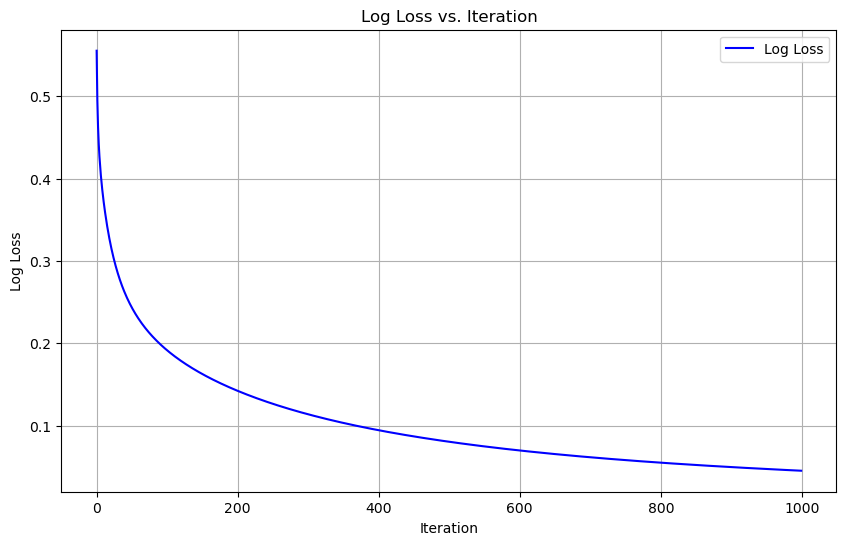

In [17]:
# Initialize parameters
b0 = 0.0
b1 = 0.0
b2 = 0.0
learning_rate = 0.01
iterations = 1000

# Lists to track log losses
log_losses = []

# Stochastic Gradient Descent
for iteration in range(iterations):
    for i, j, k in zip(df['x1'], df['x2'], df['y']):
        # Compute the prediction using the logistic function
        predict = 1 / (1 + np.exp(-(b0 + b1 * i + b2 * j)))
        error = predict - k
        
        # Update the parameters using the gradient of the loss function
        b0 -= learning_rate * error
        b1 -= learning_rate * error * i
        b2 -= learning_rate * error * j

    # Compute the log loss for this iteration
    predictions = 1 / (1 + np.exp(-(b0 + b1 * df['x1'] + b2 * df['x2'])))
    epsilon = 1e-15  # Small value to avoid log(0)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    log_loss = -np.mean(df['y'] * np.log(predictions) + (1 - df['y']) * np.log(1 - predictions))
    log_losses.append(log_loss)

# Print the optimized parameters
print(f"Optimized b0: {b0}")
print(f"Optimized b1: {b1}")
print(f"Optimized b2: {b2}")

# Make predictions
df['predicted_prob'] = 1 / (1 + np.exp(-(b0 + b1 * df['x1'] + b2 * df['x2'])))

# Convert probabilities to binary outcomes
threshold = 0.5
df['predicted_class'] = (df['predicted_prob'] >= threshold).astype(int)

# Compute accuracy
correct_predictions = (df['predicted_class'] == df['y']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

# Plotting sigmoid function vs. x1 while keeping x2 fixed
x1_values = np.linspace(df['x1'].min() - 1, df['x1'].max() + 1, 100)

# Choose a fixed value for x2
fixed_x2 = df['x2'].mean()  # or choose any specific value from df['x2']

# Compute sigmoid function
y_values = 1 / (1 + np.exp(-(b0 + b1 * x1_values + b2 * fixed_x2)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x1_values, y_values, label=f'Sigmoid Function (x2={fixed_x2:.2f})', color='blue')
plt.scatter(df['x1'], df['y'], color='red', label='Data points')
plt.xlabel('x1')
plt.ylabel('Probability')
plt.title('Sigmoid Function vs. x1 with x2 Fixed')
plt.legend()
plt.grid(True)
plt.show()

# Plotting log loss vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), log_losses, color='blue', label='Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()